# Use of machine learning techniques for heavenly bodies classification based on Sloan Digital Sky Survey

## Wprowadzenie
W tym notebooku spróbujemy przeprowadzić klasyfikację obiektów niebieskich jako gwiazdę, galaktykę lub kwazar. W tym celu spróbujemy kompletnego pojjścia jakim kierują się ludzie z dziłu tzw. Data Science. Na to podejście będzie się analiza danych, wybór cech, proces uczenia maszynowego wraz z selekcją cech oraz analiza otrzymanych wyników.

Cały proces zostanie przeprowadzony na zbiorze Sloan Digital Sky Survey.
### O zbiorze danych

Sloan Digital Sky Survey jest projektem, który oferuje publicznie dostępne dane o obserwacjach obiektów niebieskich. Dane te były zbierane od 1998r. i zostały udostępnione dla każdego, kto był zainteresowany.

Dla tego celu wykorzystany został specjalny teleskop od średnicy 2.5m, który zbudowano w Nowym Meksyku w obserwatorium Apache Point Observatory w USA. Teleskop używa kamery składającej się z 30 chipów CCD o rozdzielczości 2048x2048 każdy. Chipy są ułożone w 5 rzędów po 6 w każdym.Każdy rząd obserwuje przestrzeń kosmiczną przez zróżne optyczne filtry (u, g, r, i, z) w różnych długościach fal - 354, 476, 628, 769, 925 nm.

Teleskop pokrywa swym zasięgiem około 1/4 ziemskiego nieba - przez co skupia swój wzork na północnej części nieba.


## Analiza danych

### Zawartość
Zbiór składa się z 10 tys. obserwacji ciał niebieskich zebranych przez SDSS. Każda obserwacja jest opisana przez 17 atrybutów i jednej klasy przynależności - gwiazda, galaktyka lub kwazar.

### Opis cech

Zbiór powstał poprzez wykonaie kwerendy, która łączy ze sobą dwa widoki SQL. "PhotoObj", który zawiera fotometryczne dane oraz "SpecObj" zawierający dane spektralne.

View "PhotoObj"<br>
* **objid = Object Identifier**<br>
* **ra = J2000 Right Ascension (r-band)**<br>
* **dec = J2000 Declination (r-band)**<br>

Rektascensja, α (łac. recta ascensio – "wznoszenie proste") – jedna ze współrzędnych astronomicznych, określających położenie ciała niebieskiego na sferze niebieskiej w układzie współrzędnych astronomicznych zwanym układem równikowym równonocnym.

Definiujemy ją jako kąt dwuścienny pomiędzy płaszczyzną koła godzinnego punktu równonocy wiosennej (rektascensja równa 0h) a płaszczyzną koła godzinnego obiektu. Rektascensję nalicza się w kierunku na wschód, zgodnym z rocznym ruchem Słońca. Przyjmuje ona wartości z zakresu od 0h do 24h.

Współrzędna ta nie ulega zmianie na skutek ruchu obrotowego Ziemi, jak w przypadku kąta godzinnego. Zmianę współrzędnych, w tym deklinacji, powoduje precesja (ruch punktu Barana).

Deklinacja (łac. declinatio – „odchylenie”, oznaczana symbolem δ) – jedna ze współrzędnych określających położenie ciała w obydwu układach równikowych: równonocnym i godzinnym. Definiujemy ją jako kąt pomiędzy kierunkiem poprowadzonym od obserwatora do obiektu a płaszczyzną równika niebieskiego. Obiekty położone na północnej półkuli nieba mają deklinację dodatnią (od 0° do 90°), a na południowej ujemną (od 0° do -90°).

Zjawisko precesji skutkuje powolną zmianą współrzędnych astronomicznych (w tym rektascensji). Dlatego też oprócz nich podaje się również epokę, dla której zostały one wyznaczone (np. J2000.0).

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html
<br>
* **run = Run Number**<br>
* **rereun = Rerun Number**<br>
* **camcol = Camera column**<br>
* **field = Field number**<br>

run, rerun, camcol oraz field są cechami, które opisują pole wewnątrz obrazu wykonanego przez SDSS. Pole jest po porstu częścią całego obrazu odpowiadającego 2048x1489 pikseli. Pole może być identyfikowane przez: 
* run number - identyfikator skanu,
* camcol - kolumna kamery, numer od 1 do 6, które identyfikujące linię skanu oraz 
* field - numer pola. Numer pola zazwyczaj zaczyna się na 11 (po początkowym okresie wznoszenia) i może osiągnąć wartość 800 dla wyjątkowo długich obserwacji.
* dodatkowo numer rerun, oznacza jak obraz był przetwarzany

View "SpecObj"<br>
* **specobjid = Object Identifier**<br>
* **class = object class (galaxy, star or quasar object)**<br>
Class identyfikuje objekt jako gwiazdę, galaktykę lub kawazar. Jest to zmienna, którą będziemy chcieli przewidzieć.
<br>
* **redshift = Final Redshift**<br>
* **plate = plate number**<br>
* **mjd = MJD of observation**<br>
* **fiberid = fiber ID**<br>

W fizyce, redshift (przesunięcie ku czerwieni) występuje, kiedy śiwatło lub inne promieniowanie elektormagnetyczne obiektu jest podwyższone w długości fali lub przesunięte w stronę czerwonego końca spektrum.

Każda ekspozycja spektoskopiczna wykorzystuje dużą, cieńką, okrągłą metalową płytę, która pozycjonuje światłowody przez dziury wywiercone w lokacjach obrazów w centrum skupienia teleskopu. Światłowdy te, następnie przekazują dane do spektrografów. Każda płyta ma unikalny numer seryjny, który jest wykorzystywany w widokach takich jak "SpecObj".  
mjd jest Zmodyfikowaną Datą Julianową, która określa dzień w którym dokonano pomiaru danej próbki SDSS.

Spektograf SDSS wykorzystuje światłowody do przekazywania światła do płaszczyzny ogniskowej z poszczególnych obiektów do "szczeliny"?? Każdy obiekt ma przypisane odpowiadające mu fiberID. 

Więcej informacji o SDSS i atrybutach:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php



### Eksploracja danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# We load the data. Those that have nothing to do with the features of the objects are ignored.
sdss_data=pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')

#We have a general look at the features
sdss_data.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513


Możemy zauważyć, że brak tu jakichkolwiek zmeinnych jakośćiowych poza klasą przynależności. Jako że większość modeli ML nie radzi sobie ze zmiennymi jakościowymi - zakodujemy tą zmienną w późniejszej części naszych rozważań. 

### Statystyki opisowe

In [2]:
sdss_data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Możemy zauważyć że większość cech pozostaje w rozsądnych przedziałach podczas porównywania wartości z jednej kolumny. Możemy to wywnioskować na podstawie wartośći min, max oraz kwartyli.

### Typy danych

In [3]:
sdss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Zbiór składa się z 10 tys. obserwacji, 17 cech i 1 kolumny klasy przunależnośći. 8 z 17 cech są 64 bitowymi liczbami całkowitymi, 1 jest 64 bitowym uintem, 8 64 bitowymi liczbami zmiennoprzecinkowymi, a kolumna przynależności jest typu object - string w naszym przypadku.

### Liczność klas

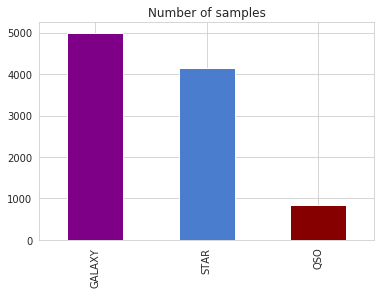

In [4]:
sdss_data['class'].value_counts()

star_color='#4a7dce'
galaxy_color='#7e0087'
qso_color='#870000'

array_color=[star_color, galaxy_color, qso_color]

sdss_data['class'].value_counts().plot(kind='bar',title='Number of samples', color=['#7e0087','#4a7dce','#870000']);

Większość próbek jest skategoryzowanych jako galaktyka (~50%), drugą najlicznijeszą kategorią są gwiazdy (~40%) a kwazary stanowią najmniej liczną grupę (~10%).

### Brakujące wartośći

In [5]:
columns = sdss_data.columns
percent_missing = sdss_data.isnull().sum() * 100 / len(sdss_data)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing')

,column_name,percent_missing
objid,objid,0.0
plate,plate,0.0
redshift,redshift,0.0
class,class,0.0
specobjid,specobjid,0.0
field,field,0.0
camcol,camcol,0.0
rerun,rerun,0.0
run,run,0.0
z,z,0.0


Jak widać nie brakuje żadnych wartośći, co oznacza, że nie musimy ani usuwać ani dodawać wartości do naszego zbioru danych.

### Filtracja danych

Już na tym etapie możemy określić, które cechy nie będą w jakikolwiek sposób powiązane z zmienną onjaśnianą. 

objid oraz specobjid są jedynie identyfiatorami, które były używane do identyfikacji rekordów kiedy jeszcze znajdowały się w bazie danych. Dlatego też nie będziemy ich brać pod uwagę podczas klasyfikacji.

Co więcej, cechy: 'run', 'rerun', 'camcol' oraz 'field' są cechami opisującymi części aparatu w momencie pomiaru obserwacji.

Źródło: http://www.sdss3.org/dr9/imaging/imaging_basics.php

W związku z powyższym usuniemy wyżej wymienione kolumny, gdzyż jakikolwiek związek z klasą przynależności byłby przypadkowy.

In [6]:
print(sdss_data.columns.values)
sdss_data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)
sdss_data.head(1)

['objid' 'ra' 'dec' 'u' 'g' 'r' 'i' 'z' 'run' 'rerun' 'camcol' 'field'
 'specobjid' 'class' 'redshift' 'plate' 'mjd' 'fiberid']


,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.0424,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491


## Analiza uniwariatywna

### Redshift

By przeprowadzić analizę uniwariatywną zaczniemy od histogramów dla cechy 'redshift' dla każdej z klas. Powie nam to w jaki sposób przesunięcie ku czerwieni jest zdystrybuowane wśród klas.

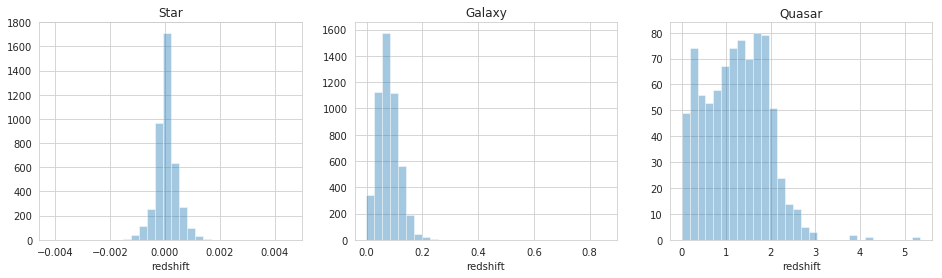

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

Widzimy, że wartości przesunięcia ku czerwieni znacząco różnią się pośród klas. 

* Gwiazdy - widzimy, że histogram przypomina rozkład normalny o średniej u=0
* Galaktyki - tutaj wartości wydają się pochodzić z rozkładu normalnego o nieco cięższym prawym ogonie. Rozkład ten ma średnią wartść wokół punktu 0.075.
* Kwazary - wrtości przesunię cia ku czerwieni są o wiele bardziej jednorodnie rozproszone, niż w przypadku gwiazd i galaktyk. Są one mniej więcej równo rozproszone w przedziale od 0 do 3, póżniej ich występowanie zdaje się zanikać drastycznie. Blisko wartości 4 i 5 mamy parę wartości odstających.

### Rektascensja

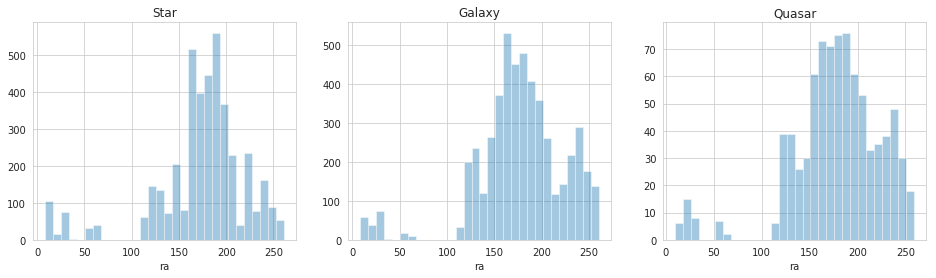

In [8]:
# Right Ascension
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].ra, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].ra, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].ra, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### Deklinacja

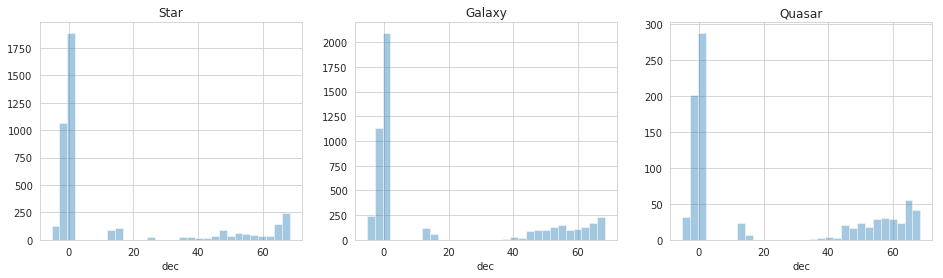

In [9]:
# Declination
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].dec, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].dec, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].dec, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### U

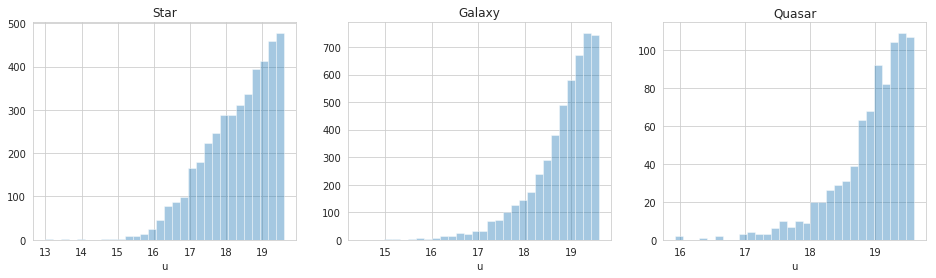

In [10]:
# U
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].u, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].u, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].u, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### G

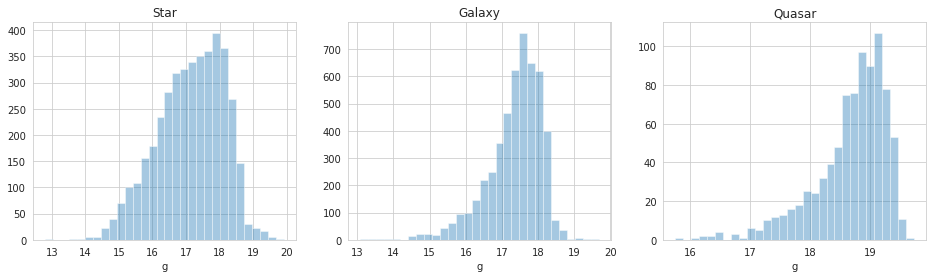

In [11]:
# G
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].g, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].g, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].g, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### R

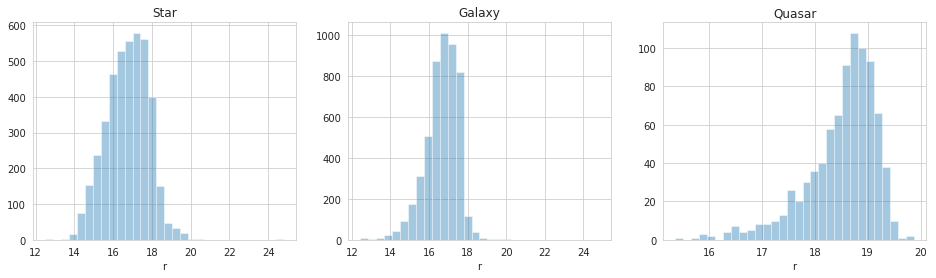

In [12]:
# R
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].r, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].r, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].r, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### I

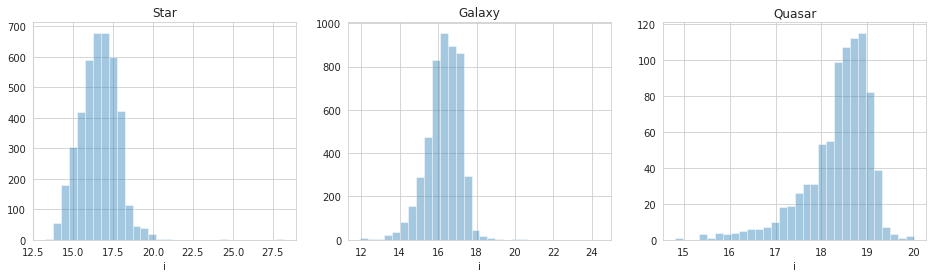

In [13]:
# I
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].i, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].i, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].i, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### Z

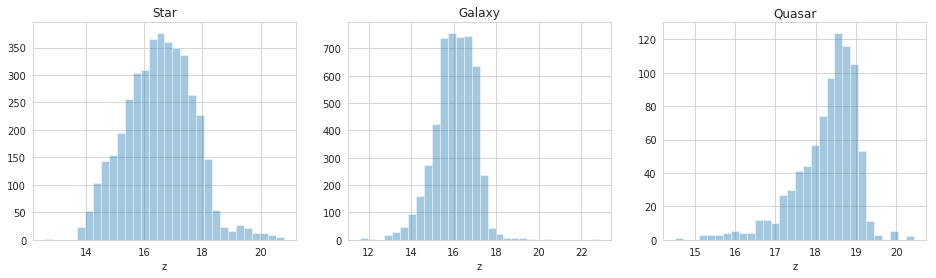

In [14]:
#Z
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].z, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].z, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].z, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### Plate

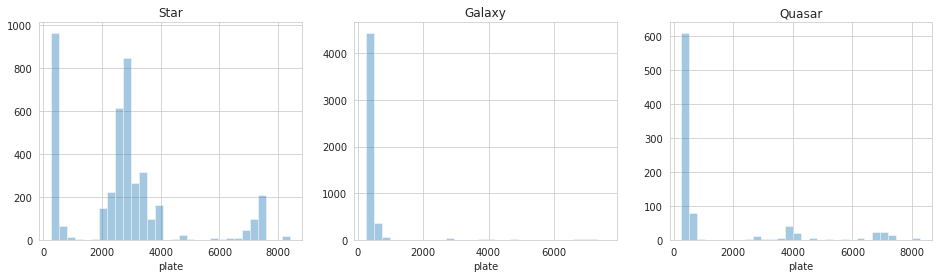

In [15]:
# Plate
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].plate, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].plate, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].plate, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### MDJ

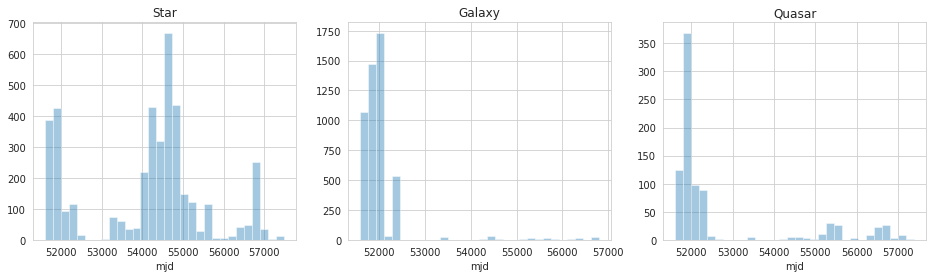

In [16]:
# MDJ
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].mjd, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].mjd, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].mjd, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### FiberID

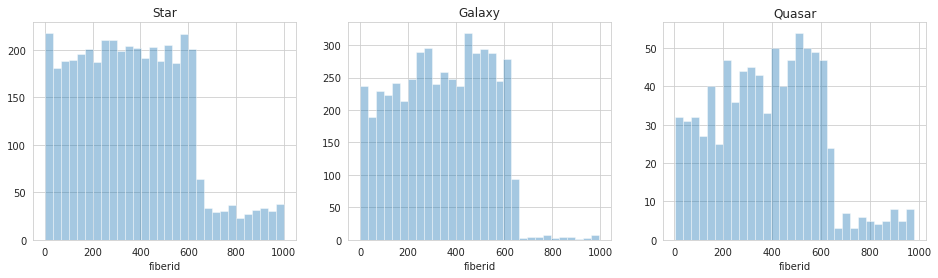

In [17]:
# FiberID
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(sdss_data[sdss_data['class']=='STAR'].fiberid, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_data[sdss_data['class']=='GALAXY'].fiberid, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_data[sdss_data['class']=='QSO'].fiberid, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

TODO Wnioski

### Korelacja zmiennych

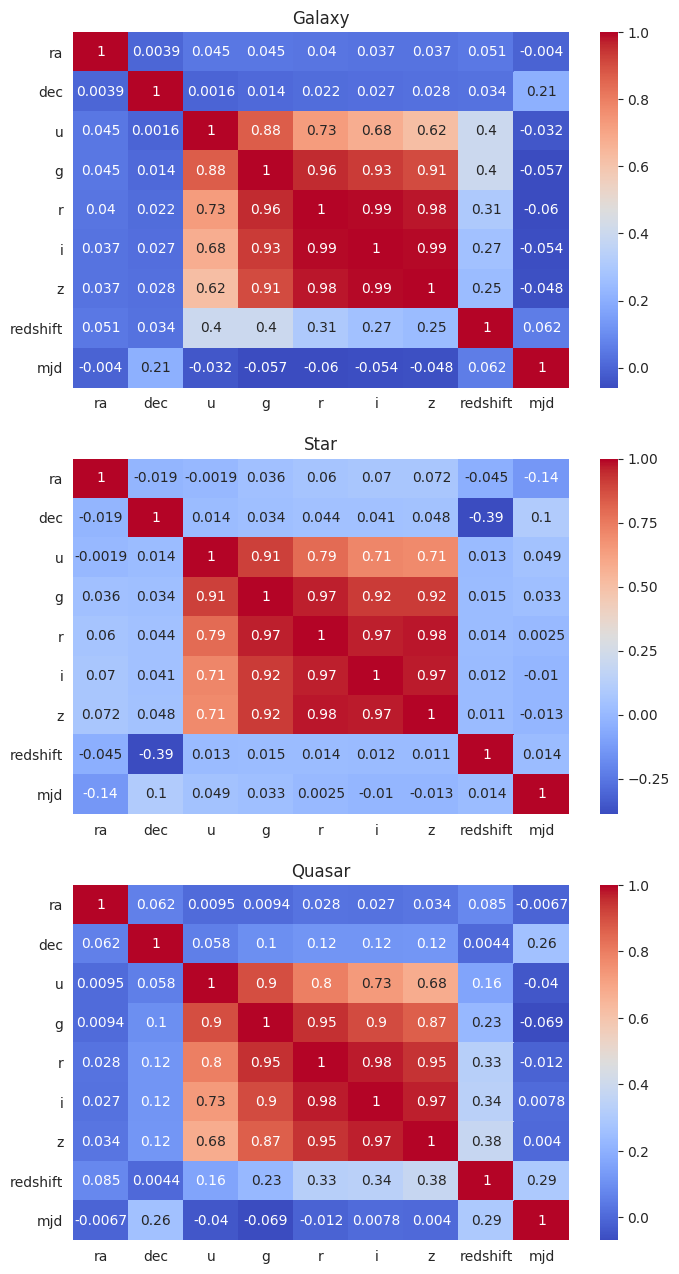

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(8, 16))
fig.set_dpi(100)
ax = sns.heatmap(sdss_data[sdss_data['class']=='GALAXY'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[0], cmap='coolwarm', annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(sdss_data[sdss_data['class']=='STAR'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[1], cmap='coolwarm', annot=True)
ax.set_title('Star')
ax = sns.heatmap(sdss_data[sdss_data['class']=='QSO'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[2], cmap='coolwarm', annot=True)
ax = ax.set_title('Quasar')